### Student Information
Name: 施泳瑜

Student ID: 107071016

GitHub ID: la83la

# "First"
do the take home exercises in the DM2021-Lab1-master Repo. You may need to copy some cells from the Lab notebook to this notebook. This part is worth 20% of your grade.

In [93]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### >>> Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [94]:
import pandas as pd

groups = ["Movies", "Sports", "Coding", "Fishing", "Dancing", "Cooking"]
num = [43, 23, 56, 7, 72, 9]

dicttt = {"groups": groups,
       "num": num
       }

select_df = pd.DataFrame(dicttt)
# select from the dict with num > 10
out_df = select_df[select_df.loc[:, "num"] > 10]
print(out_df)
print()

# more col for whether the num > 10
select_df[">10"] = select_df.apply(lambda data: data[1] > 10, axis=1)
print(select_df)

    groups  num
0   Movies   43
1   Sports   23
2   Coding   56
4  Dancing   72

    groups  num    >10
0   Movies   43   True
1   Sports   23   True
2   Coding   56   True
3  Fishing    7  False
4  Dancing   72   True
5  Cooking    9  False


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [95]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [96]:
NA_df['missing_example'].isnull()
type(NA_df['missing_example'])

pandas.core.series.Series

### Answer here
".isnull" lose efficancy! Because the result should show all of the examples are missing value.
However, only 

- (1) np.nan
- (2) 
- (3) None be detected; 

Unfortunately, 

- (1) 'Nan' 
- (2) 'None' 
- (3) '' be consider "a value".


I think the bug came from the system regard 'Nan', 'None', and '' as the word. And a word is a value. Therefore, the function to check if they are missing values misjudge.

##### PS. about na is not na 

The NA(‘Not Available’) of character type is distinct from the string "NA". Therefore, programmers who need to specify an explicit missing string should use NA_character_ (rather than "NA") . Because NA is a logical constant of length 1 which contains a missing value indicator.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [97]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

import helpers.data_mining_helpers as dmh
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [98]:
# first run

X_sample1 = X.sample(n=1000) 
X_sample1

,text
1662,From: PETCH@gvg47.gvg.tek.com (Chuck) Subject:...
602,From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...
1434,From: amigan@cup.portal.com (Mike - Medwid) Su...
2127,From: sfp@lemur.cit.cornell.edu (Sheila Patter...
...,...
496,From: dhartung@chinet.chi.il.us (Dan Hartung) ...
209,From: jhpb@sarto.budd-lake.nj.us (Joseph H. Bu...
1791,From: heath@athena.cs.uga.edu (Terrance Heath)...
1240,From: wcsbeau@superior.carleton.ca (OPIRG) Sub...


In [99]:
# second run

X_sample2 = X.sample(n=1000) 
X_sample2

,text
1364,"From: haston@utkvx.utk.edu (Haston, Donald Way..."
549,From: mas@Cadence.COM (Masud Khan) Subject: Re...
2043,From: keith@cco.caltech.edu (Keith Allan Schne...
376,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
460,From: ata@hfsi.hfsi.com ( John Ata) Subject: R...
...,...
1075,From: mprc@troi.cc.rochester.edu (M. Price) Su...
80,From: annick@cortex.physiol.su.oz.au (Annick A...
1622,From: bil@okcforum.osrhe.edu (Bill Conner) Sub...
1615,From: mdf0@shemesh.GTE.com (Mark Feblowitz) Su...


### Answer here

In the above two X_sample, the result is differenct. We can know that output will be distinct eveytimes as it returns a random item. Because after choosing the number of items(i.e. n) for one sample, the function will do the process one by one. Then from the DataFrame object.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

In [100]:
from sklearn.datasets import fetch_20newsgroups


# choose traing data
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# constraint categories: load only a sub-selection of the categories
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

import pandas as pd
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

([<matplotlib.axis.XTick at 0x18303583f10>,
 [Text(0.125, 0, 'soc.religion.christian'),
  Text(1.125, 0, 'sci.med'),
  Text(2.125, 0, 'comp.graphics'),
  Text(3.125, 0, 'alt.atheism')])

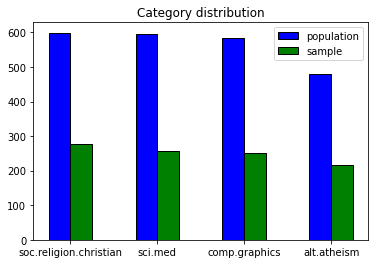

In [101]:
import matplotlib.pyplot as plt

X_sample = X.sample(n=1000)

width = 0.25
x1 = X.category_name.value_counts().values
cate = X.category_name.value_counts().index
x2 = X_sample.category_name.value_counts().values
n = len(x1)
r = np.arange(n)

bar1 = plt.bar(r, x1, color ='b', width=width, edgecolor = 'black', label='population')
bar2 = plt.bar(r+width, x2, color ='g', width=width, edgecolor = 'black', label='sample')

plt.title("Category distribution")
plt.legend((bar1, bar2), ('population', 'sample'))
plt.xticks(r+width/2, cate)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)


In [103]:
i = 5
find = np.nonzero(X_counts[i-1:i, 0:100].toarray())[1] # find is two-dimension, but the row='0', we only need col terms
for element in find:
    print(count_vect.get_feature_names()[element])

00
01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [104]:
top20 = count_vect.get_feature_names()[0:20]
plot_x = ["term_" + i for i in top20 ]
top20_version2 = list(X.index)[0:20]
plot_y = ["doc_"+ str(i)for i in top20_version2]
plot_z = X_counts[0:20, 0:20].toarray()

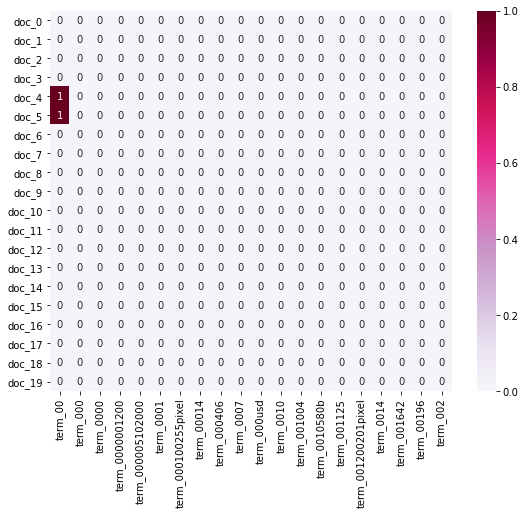

In [105]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

From the expiernment, I found it's hard for me to run all of the data. I think we should only show significant data. 

In [106]:
X_array = X_counts.toarray()
X_sum = X_array.sum(axis = 0)
X_choose = list(filter(lambda x:x.sum(axis = 0) > 1000, X_array))
X_choose

[array([0, 4, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([1, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([1, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([2, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([1, 5, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([2, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([1, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dt

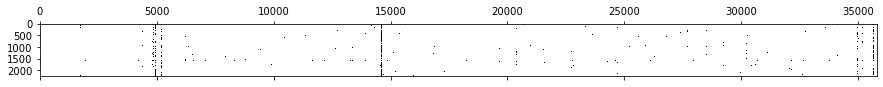

In [107]:
A = pd.DataFrame(X_array)
plt.figure(figsize=(15, 15))
plt.spy(A, precision = 0.1)


### ----------my thought----------

As the result above, we can see this sparse matrix is not efficient.
Therefore, I think it can filter some nonsignificant data, like frequenciy < 1000's terms.
(doint it in the below)

In [108]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies = list(term_frequencies)
choose = []
for i in term_frequencies:
    if(i > 1000):
        choose.append(count_vect.get_feature_names()[term_frequencies.index(i)])
choose 

['about',
 'all',
 'also',
 'an',
 'and',
 'any',
 'are',
 'article',
 'as',
 'at',
 'be',
 'been',
 'but',
 'by',
 'can',
 'com',
 'do',
 'does',
 'don',
 'edu',
 'for',
 'from',
 'god',
 'has',
 'have',
 'he',
 'his',
 'how',
 'if',
 'in',
 'is',
 'it',
 'just',
 'know',
 'like',
 'lines',
 'me',
 'more',
 'my',
 'no',
 'not',
 'of',
 'on',
 'one',
 'only',
 'or',
 'organization',
 'other',
 'out',
 'people',
 're',
 'so',
 'some',
 'subject',
 'than',
 'that',
 'the',
 'their',
 'there',
 'they',
 'think',
 'this',
 'to',
 'university',
 'was',
 'we',
 'were',
 'what',
 'when',
 'which',
 'who',
 'will',
 'with',
 'would',
 'writes',
 'you',
 'your']

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

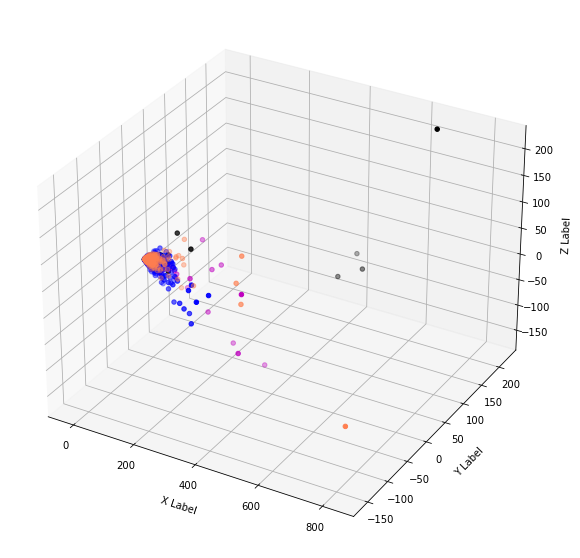

In [109]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced

col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    
    ax.scatter3D(xs, ys, zs, c = c, marker='o');
    
    
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [110]:
import plotly.express as px

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
fig  = px.scatter(x=count_vect.get_feature_names()[:50], 
            y=term_frequencies[:50])

fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [111]:
data14 = count_vect.get_feature_names()
data14_f = term_frequencies
data14_dict = {}

for i in range(0,len(data14)):
    data14_dict[(data14[i])] = data14_f[i]

avg = sum(data14_dict.values())/len(data14)

x14=[]
y14=[]
for i in range(0,len(data14)):
    if(data14_f[i] > avg*10):
        x14.append(data14[i])
        y14.append(data14_f[i])
    

In [112]:
x14

['10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '19',
 '1993',
 '20',
 '24',
 '3d',
 'able',
 'about',
 'above',
 'ac',
 'actually',
 'after',
 'again',
 'against',
 'agree',
 'all',
 'also',
 'always',
 'am',
 'among',
 'an',
 'and',
 'another',
 'answer',
 'any',
 'anyone',
 'anything',
 'apr',
 'are',
 'argument',
 'around',
 'article',
 'as',
 'ask',
 'at',
 'atheism',
 'atheist',
 'atheists',
 'au',
 'available',
 'away',
 'back',
 'bad',
 'banks',
 'based',
 'be',
 'because',
 'been',
 'before',
 'being',
 'belief',
 'believe',
 'best',
 'better',
 'between',
 'bible',
 'bit',
 'body',
 'book',
 'both',
 'but',
 'by',
 'ca',
 'call',
 'called',
 'caltech',
 'can',
 'cannot',
 'case',
 'cause',
 'cc',
 'center',
 'certain',
 'certainly',
 'christ',
 'christian',
 'christianity',
 'christians',
 'church',
 'claim',
 'co',
 'code',
 'color',
 'com',
 'come',
 'computer',
 'could',
 'course',
 'cs',
 'data',
 'david',
 'day',
 'de',
 'death',
 'did',
 'didn',
 'different',
 'diseas

In [113]:
fig  = px.scatter(y14, x14)
fig.show()

### ----------my thought----------
The word with count > 10*avg is significant enough to this data!!

It is the easy way for me to implement once.

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below


![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

([], [])

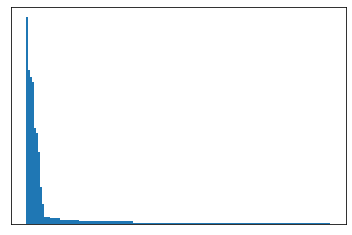

In [114]:
x = count_vect.get_feature_names()[:150]
y = term_frequencies[:150]
l = len(x)
z = []
for i in range(0, l):
    tmp = ( y[i], x[i])
    z.append(tmp)
z = sorted(z, reverse=True)

x1 = []
y1 = []
for i in range(0, l):
    x1.append(z[i][0])
    y1.append(z[i][1])

plt.bar(y1, x1, width = 1)
plt.xticks([])
plt.yticks([])


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [115]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)

X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 0, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 0, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 0]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 0]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 0]"
...,...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med,"[0, 0, 0, 0]"
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,"[0, 0, 0, 0]"
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med,"[0, 0, 0, 0]"
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med,"[0, 0, 0, 0]"


### Answer here

No! 
With "category_name" future, if we want to catgorize all the possibility and making it a binary feature, we still need transfrom them into  ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']. It's the same as "category" future's binarization.<br>
Above all, if we want to deal with "category_name" future's binarization. We need to make the feature into the "category" future's form. Then use "category" future's form to generate the binarization.


##### for example (correct way)
--> ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']: categorization<br>
--> [0,1,2,3]: numericalization<br>
--> [0 or 1, 0 or 1, 0 or 1, 0 or 1]: binarization

-----------------------------------------------------------------------------------------------------
# "Second"
follow the same process from the DM2021-Lab1-master Repo on the new dataset. You don't need to explain all details as we did (some minimal comments explaining your code are useful though).
- Download the the new dataset. The dataset contains a sentence and score label. Read the specificiations of the dataset for details.

- You are allowed to use and modify the helper functions in the folder of the first lab session (notice they may need modification) or create your own.

## 1. The Data

In [116]:
f1 = open("C:/Users/user/Desktop/DataMining/DM2021-Lab1-Homework-main/yelp_labelled.txt", "r")
f2 = open("C:/Users/user/Desktop/DataMining/DM2021-Lab1-Homework-main/amazon_cells_labelled.txt", "r")
f3 = open("C:/Users/user/Desktop/DataMining/DM2021-Lab1-Homework-main/imdb_labelled.txt", "r", encoding="utf-8")
yelp = []
amazon = []
imdb = []
yelp.extend(f1.readlines())
amazon.extend(f2.readlines())
imdb.extend(f3.readlines())
company = ["yelp", "amazon", "imdb"]
# len(data)
# data[0:10]

## 2. Data Preparation

In [117]:
import pandas as pd
import numpy as np

def _fun(data, company):
    dicttt = pd.DataFrame(columns=["sentence", "score", "company"])
    for e in data[:]:
        e = e.strip()
        tokens = e.split("\t")
        #print(tokens[0])
        #print(tokens[1])
        tmp = {"sentence":tokens[0], "score":tokens[1], "company":company}
        #print(type(tmp))
        dicttt = dicttt.append(tmp, ignore_index=True)
    return dicttt

yelp_data = _fun(yelp, "yelp")
amazon_data = _fun(amazon, "amazon")
imdb_data = _fun(imdb, "imdb")

In [118]:
data = pd.concat([yelp_data , amazon_data, imdb_data], ignore_index = True)
data

,sentence,score,company
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
...,...,...,...
2995,I just got bored watching Jessice Lange take h...,0,imdb
2996,"Unfortunately, any virtue in this film's produ...",0,imdb
2997,"In a word, it is embarrassing.",0,imdb
2998,Exceptionally bad!,0,imdb


In [119]:
print(data.company.unique())
print(len(data.sentence))
print(len(data.score))

['yelp' 'amazon' 'imdb']
3000
3000


## 3. Data Transformation

It's already be a dataframe.

#### Adding Columns

In [120]:
c = list(data.company.unique())
c.index(data.company[0])

0

In [121]:
c = list(data.company.unique())
c.index(data.company[0])
data['company_index'] = data.company.apply(lambda t: dmh.format_labels2(t, c))
print(data)

                                               sentence score company  \
0                              Wow... Loved this place.     1    yelp   
1                                    Crust is not good.     0    yelp   
2             Not tasty and the texture was just nasty.     0    yelp   
3     Stopped by during the late May bank holiday of...     1    yelp   
4     The selection on the menu was great and so wer...     1    yelp   
...                                                 ...   ...     ...   
2995  I just got bored watching Jessice Lange take h...     0    imdb   
2996  Unfortunately, any virtue in this film's produ...     0    imdb   
2997                   In a word, it is embarrassing.       0    imdb   
2998                               Exceptionally bad!       0    imdb   
2999  All in all its an insult to one's intelligence...     0    imdb   

      company_index  
0                 0  
1                 0  
2                 0  
3                 0  
4            

In [122]:
data['sentence_l'] = data.sentence.apply(lambda t: len(t))
data

,sentence,score,company,company_index,sentence_l
0,Wow... Loved this place.,1,yelp,0,24
1,Crust is not good.,0,yelp,0,18
2,Not tasty and the texture was just nasty.,0,yelp,0,41
3,Stopped by during the late May bank holiday of...,1,yelp,0,87
4,The selection on the menu was great and so wer...,1,yelp,0,59
...,...,...,...,...,...
2995,I just got bored watching Jessice Lange take h...,0,imdb,2,63
2996,"Unfortunately, any virtue in this film's produ...",0,imdb,2,92
2997,"In a word, it is embarrassing.",0,imdb,2,32
2998,Exceptionally bad!,0,imdb,2,20


In [123]:
# easy querying
data[::10][["sentence", "company"]]

,sentence,company
0,Wow... Loved this place.,yelp
10,Service was very prompt.,yelp
20,The Burrittos Blah!,yelp
30,"Also there are combos like a burger, fries, an...",yelp
40,The shrimp tender and moist.,yelp
...,...,...
2950,Both Rickman and Stowe play their roles to the...,imdb
2960,I was particularly pleased with the acting abi...,imdb
2970,Enough can not be said of the remarkable anima...,imdb
2980,Judith Light is one of my favorite actresses a...,imdb


In [124]:
select_df = data[::][["sentence", "sentence_l"]]
select_df["# of word <10"] = data.sentence_l.apply(lambda t: t < 25)
print(select_df)

                                               sentence  sentence_l  \
0                              Wow... Loved this place.          24   
1                                    Crust is not good.          18   
2             Not tasty and the texture was just nasty.          41   
3     Stopped by during the late May bank holiday of...          87   
4     The selection on the menu was great and so wer...          59   
...                                                 ...         ...   
2995  I just got bored watching Jessice Lange take h...          63   
2996  Unfortunately, any virtue in this film's produ...          92   
2997                   In a word, it is embarrassing.            32   
2998                               Exceptionally bad!            20   
2999  All in all its an insult to one's intelligence...          75   

      # of word <10  
0              True  
1              True  
2             False  
3             False  
4             False  
...            

In [125]:
data["positive"] = data.score.apply(lambda t: int(int(t) == 1))
data["negative"] = data.score.apply(lambda t: int(int(t) == 0))
data

,sentence,score,company,company_index,sentence_l,positive,negative
0,Wow... Loved this place.,1,yelp,0,24,1,0
1,Crust is not good.,0,yelp,0,18,0,1
2,Not tasty and the texture was just nasty.,0,yelp,0,41,0,1
3,Stopped by during the late May bank holiday of...,1,yelp,0,87,1,0
4,The selection on the menu was great and so wer...,1,yelp,0,59,1,0
...,...,...,...,...,...,...,...
2995,I just got bored watching Jessice Lange take h...,0,imdb,2,63,0,1
2996,"Unfortunately, any virtue in this film's produ...",0,imdb,2,92,0,1
2997,"In a word, it is embarrassing.",0,imdb,2,32,0,1
2998,Exceptionally bad!,0,imdb,2,20,0,1


## 4. Data Mining using Pandas

In [126]:
data.isnull()

,sentence,score,company,company_index,sentence_l,positive,negative
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False


In [127]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,company,company_index,sentence_l,positive,negative
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0


In [128]:
data.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [129]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [130]:
sum(data.duplicated())

17

In [131]:
# print them
data[data.duplicated()==True]

,sentence,score,company,company_index,sentence_l,positive,negative
814,I love this place.,1,yelp,0,18,1,0
816,The food was terrible.,0,yelp,0,22,0,1
843,I won't be back.,0,yelp,0,16,0,1
846,I would not recommend this place.,0,yelp,0,33,0,1
1285,Great phone!.,1,amazon,1,13,1,0
1407,Works great.,1,amazon,1,12,1,0
1524,Works great!.,1,amazon,1,13,1,0
1543,Don't buy this product.,0,amazon,1,23,0,1
1744,If you like a loud buzzing to override all you...,0,amazon,1,90,0,1
1748,Does not fit.,0,amazon,1,13,0,1


Do not know where the error is!!

In [132]:
data.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [133]:
len(data)

2966

## 5.  Data Preprocessing

### 5.1 Sampling

In [134]:
D_sample = data.sample(n=300) #random state
D_sample

,sentence,score,company,company_index,sentence_l,positive,negative
155,the staff is friendly and the joint is always ...,1,yelp,0,52,1,0
2706,The show would begin with smart ass ed comment...,0,imdb,2,116,0,1
2775,You won't forget this movie!,1,imdb,2,30,1,0
2149,The only possible way this movie could be rede...,0,imdb,2,78,0,1
1549,I own a Jabra Earset and was very happy with i...,1,amazon,1,111,1,0
...,...,...,...,...,...,...,...
2731,It handles some tough issues with dignity and ...,1,imdb,2,98,1,0
1365,awesome device.,1,amazon,1,15,1,0
2632,I'll give this film 10 out of 10!,1,imdb,2,35,1,0
865,"They have a plethora of salads and sandwiches,...",1,yelp,0,98,1,0


In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

### compare population and sample
#### (a) about length of sentence's count, mean, max and min for each company

In [136]:
print(data["sentence_l"].agg(["mean"]))
data.groupby("company")["sentence_l"].agg(["count","mean", "max","min"])

mean    65.758597
Name: sentence_l, dtype: float64


,count,mean,max,min
company,,,,
amazon,980,55.861224,149,11
imdb,994,82.653924,479,8
yelp,992,58.606855,149,11


In [137]:
print(D_sample["sentence_l"].agg(["mean"]))
D_sample.groupby("company")["sentence_l"].agg(["count","mean", "max","min"])

mean    65.846667
Name: sentence_l, dtype: float64


,count,mean,max,min
company,,,,
amazon,104,54.000000,149,11
imdb,97,83.597938,317,13
yelp,99,60.898990,146,14


#### (b) about length of sentence's interquartile

In [138]:
import numpy as np
lower_q=np.quantile(data["sentence_l"],0.25,interpolation='lower') 
mid=np.quantile(data["sentence_l"],0.5,interpolation='midpoint') 
higher_q=np.quantile(data["sentence_l"],0.75,interpolation='higher')

D_lower_q=np.quantile(D_sample["sentence_l"],0.25,interpolation='lower') 
D_mid=np.quantile(D_sample["sentence_l"],0.5,interpolation='midpoint') 
D_higher_q=np.quantile(D_sample["sentence_l"],0.75,interpolation='higher')

print("population:", lower_q, "/", mid, "/", higher_q)
print("sample:", D_lower_q, "/", D_mid, "/", D_higher_q)

population: 33 / 56.0 / 88
sample: 33 / 57.0 / 91


#### (c) about the scores' distribution

([<matplotlib.axis.XTick at 0x183039e3a90>,
 [Text(0.175, 0, 'negative'), Text(1.175, 0, 'positive')])

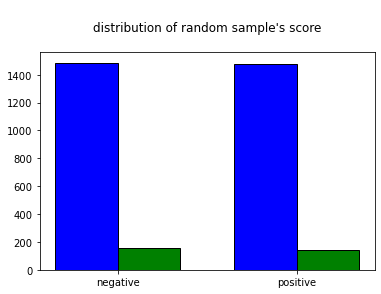

In [139]:
# plot barchart for X_sample
width = 0.35
x1 = data.score.value_counts().values
category = ["negative", "positive"]
x2 = D_sample.score.value_counts().values
n = len(x1)
r = np.arange(n)


bar1 = plt.bar(r, x1, color ='b', width=width, edgecolor = 'black', label='population')
bar2 = plt.bar(r+width, x2, color ='g', width=width, edgecolor = 'black', label='sample')

plt.title("\ndistribution of random sample's score\n")
# plt.legend((bar1, bar2), ('population', 'sample'))
plt.xticks(r+width/2, category)

-----------------------------------------------------------------------------------------------------
# "Third"
please attempt the following tasks on the new dataset.


Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.

Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .

Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.

## 1. Generate meaningful new data visualizations.

### - first: the most word frequency terms

#### (a)Show the count table

In [140]:
from collections import Counter

strrr = " ".join(data["sentence"])

term_frequencies = Counter(strrr.split())

x1 = list(term_frequencies.keys())
y1 = list(term_frequencies.values())

df0 = pd.DataFrame(y1, x1)
df0

,0
Wow...,1
Loved,3
this,434
place.,18
Crust,1
...,...
virtue,1
regrettable,1
embarrassing.,1
Exceptionally,1


#### (b)Show the count > avg*30's term

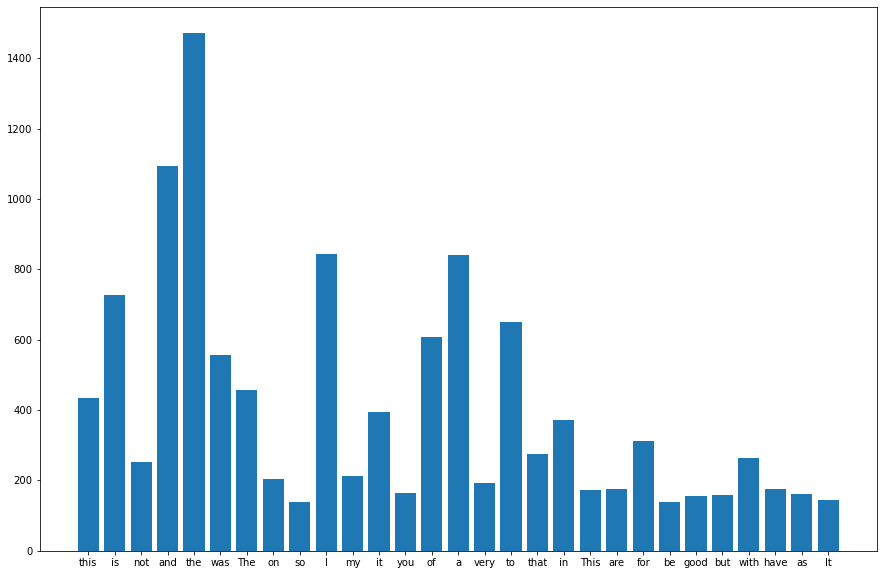

In [141]:
x_select1 = []
y_select1 = []
l = len(y1)
avg = sum(y1)/len(y1)

for i in range(0, l-1):
    if(y1[i]>avg*30):
        x_select1.append(x1[i])
        y_select1.append(y1[i])

plt.figure(figsize=(15,10))
plt.bar(x_select1, y_select1)
plt.show()

### - second: cool circular barplot (so beautiful! )

In [142]:
df = pd.DataFrame( y_select1, x_select1)

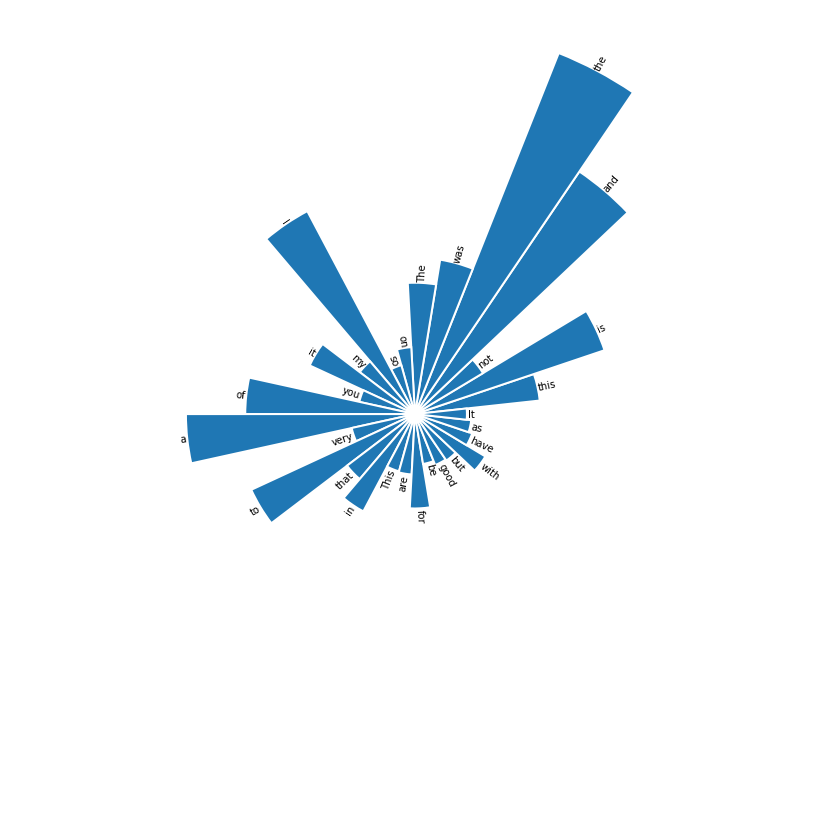

In [143]:
plt.figure(figsize=(15,15))

ax = plt.subplot(111, polar=True)

plt.axis('off') # remove grid

upperLimit = 100
lowerLimit = 30

max = df[0].max()

# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df[0] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white")

# little space between the bar and the label
labelPadding = 4
# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

##### sorted version => more cool!!!

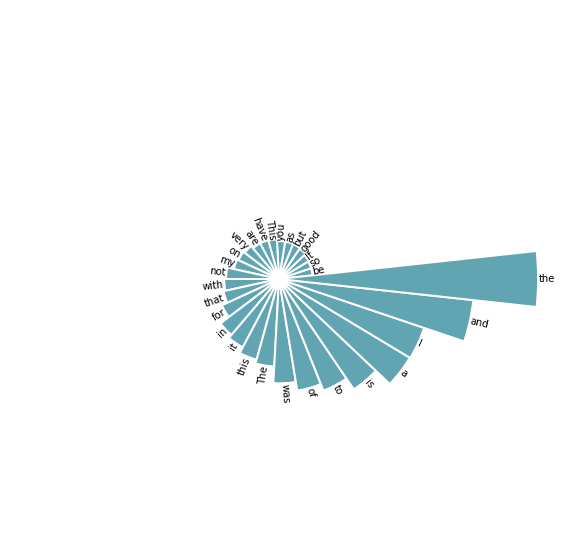

In [144]:
# Reorder the dataframe
df = df.sort_values(by=[0])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df[0].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df[0] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

### - third: wordcloud for combined three data

we can see the most frequency words directly

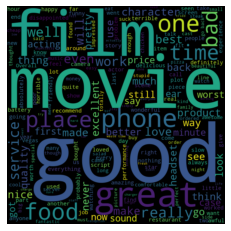

In [162]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create the wordcloud object
wordcloud = WordCloud(width=800, height=800, margin=0).generate(strrr)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

The visualization process is so amazing. Inspired me a lots!!!!!

## 2. Generate TF-IDF features from the tokens of each text. 
This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .

#### TF-IDF value per document
- TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

In [146]:
# try small data to realize 

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

documentA = 'the man went out for a walk'
documentB = 'the children sat around the fire'

bagOfWordsA = documentA.split(' ')
bagOfWordsB = documentB.split(' ')

uniqueWords = set(bagOfWordsA).union(set(bagOfWordsB))

numOfWordsA = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsA:
    numOfWordsA[word] += 1
numOfWordsB = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsB:
    numOfWordsB[word] += 1

#The number of times a word appears in a document divded by the total number of words in the document.
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

tfA = computeTF(numOfWordsA, bagOfWordsA)
tfB = computeTF(numOfWordsB, bagOfWordsB)

#The log of the number of documents divided by the number of documents that contain the word w. 
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf
idfs = computeIDF([numOfWordsA, numOfWordsB])

tfidfA = computeTFIDF(tfA, idfs)
tfidfB = computeTFIDF(tfB, idfs)
df = pd.DataFrame([tfidfA, tfidfB])

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([documentA, documentB])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
# df

In [147]:
# implementation in my goal data

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data.sentence)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
index = 0
a = list(df.iloc[index])
b = list(df.iloc[index].index)
for i in a:
    if(i!=0):
        print(i, b[a.index(i)])
data.sentence[0]

0.5631593363127967 loved
0.4113984271605435 place
0.24799697094725395 this
0.6723841152604277 wow


'Wow... Loved this place.'

## 3.Implement a simple Naive Bayes classifier 
that automatically classifies the records into their categories. 

Use both the TF-IDF features and word frequency features to build two seperate classifiers. 

### (1)TF-IDF features

Convert the sentence in TF-IDF score(df) and Run multinomial Naive Bayes classifier



#### First of all, we divide the data into training and testing parts.

In [149]:
data.head()

,sentence,score,company,company_index,sentence_l,positive,negative
0,Wow... Loved this place.,1,yelp,0,24,1,0
1,Crust is not good.,0,yelp,0,18,0,1
2,Not tasty and the texture was just nasty.,0,yelp,0,41,0,1
3,Stopped by during the late May bank holiday of...,1,yelp,0,87,1,0
4,The selection on the menu was great and so wer...,1,yelp,0,59,1,0


In [150]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.4)

train_X = train_data['sentence']
train_y = train_data['score']   # '1' corresponds to Label (1 - positive and 0 - negative)
test_X = test_data['sentence']
test_y = test_data['score']

tf_idf = TfidfVectorizer()
X_train_tf = tf_idf.fit_transform(train_X) #applying tf idf to training data
print("n_samples: %d, n_features: %d" % X_train_tf.shape)
X_test_tf = tf_idf.transform(test_X)
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 1779, n_features: 3793
n_samples: 1187, n_features: 3793


#### creating a Multinomial Naive Bayes model

In [151]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, train_y)

MultinomialNB()

#### predicted y... then we can print the classification report.

In [152]:
y_pred = naive_bayes_classifier.predict(X_test_tf)

print(metrics.classification_report(test_y, y_pred, target_names=['Positive', 'Negative']))

              precision    recall  f1-score   support

    Positive       0.84      0.82      0.83       613
    Negative       0.82      0.84      0.83       574

    accuracy                           0.83      1187
   macro avg       0.83      0.83      0.83      1187
weighted avg       0.83      0.83      0.83      1187



#### check the confusion matrix

In [153]:
print("Confusion matrix:")
print(metrics.confusion_matrix(test_y, y_pred))

Confusion matrix:
[[505 108]
 [ 94 480]]


In [154]:
from sklearn import metrics
 
metrics.accuracy_score(y_pred , test_y)

0.8298230834035384

### (2)word frequency

In [155]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
coun_vect = CountVectorizer() # or can use "lowercase=False"
count_matrix = coun_vect.fit_transform(data.sentence)
count_array = count_matrix.toarray()
df2 = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
df2

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
index = 0
a = list(df2.iloc[index])
b = list(df2.iloc[index].index)
for i in range(0, len(a)):
    if(a[i]!=0):
        print(1, b[i])
data.sentence[0]

1 loved
1 place
1 this
1 wow


'Wow... Loved this place.'

#### After I have "Bag of Word", throw into model.

In [157]:
from sklearn.naive_bayes import MultinomialNB

MNB_model = MultinomialNB()
MNB_model.fit(count_matrix, data['score'])

MultinomialNB()

In [158]:
coun_vect = CountVectorizer()
X_train_count = coun_vect.fit_transform(train_X) #applying tf idf to training data
print("n_samples: %d, n_features: %d" % X_train_count.shape)
X_test_count = coun_vect.transform(test_X)
print("n_samples: %d, n_features: %d" % X_test_count.shape)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_count, train_y)

y_pred = naive_bayes_classifier.predict(X_test_count)
print(metrics.classification_report(test_y, y_pred, target_names=['Positive', 'Negative']))

print(metrics.confusion_matrix(test_y, y_pred))

n_samples: 1779, n_features: 3793
n_samples: 1187, n_features: 3793
              precision    recall  f1-score   support

    Positive       0.83      0.83      0.83       613
    Negative       0.82      0.82      0.82       574

    accuracy                           0.82      1187
   macro avg       0.82      0.82      0.82      1187
weighted avg       0.82      0.82      0.82      1187

[[507 106]
 [106 468]]


In [159]:
from sklearn import metrics
 
metrics.accuracy_score(y_pred , test_y)

0.8213984835720304

### ----------my thought---------

In this case, I use 60% train & 40% test to measure the accuracy of my model. The tfidf model return 0.806234203875316 accuracy score, and the word frequency model return 0.8163437236731256. It is not such a big difference from this example.

However, in my opinion, when us measure the performance between these two, the tfidf way should be more precisious. Maybe just not in this case.

-----------------------------------------------------------------------------------------------------
## "Fourth"

In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? 

### ----------my thought---------

After I have done this hw, I found that it’s almost rare that all the variables in the dataset are useful to build a model. In addition, adding redundant variables reduces the generalization capability of the model and may also reduce the overall accuracy of a classifier. In the end, increasing the overall complexity of the model.

So with my dataset, I want to put more effort in technique that is used to convert the raw data into a clean data set. I will explain what I will do one by one in the sections below!

### - First

    I will use "variance thresholding" for robust feature selection
It is common for datasets to have hundreds if not thousands of features(maybe not in our hw, but I think the cocept still can use on it). On the surface, this might seem like a good thing, because in most of us opinion, more features give more information about each sample. However, more often than not, these additional features don’t provide that much value and introduce unnecessary complexity. So we need to "separate the wheat from the chaff" by using "variance thresholding" for robust feature selection.

### - Second

    After the first step, I will do "standardization" to my data.
    
From my major: statistics, I deeply understand how importance the standardization is for whole data. It is a critical process that deals with the mean and standard deviation of the data points. As raw data, the values are varying from very low to very high. So, to avoid the low performance in the model we use standardization. It says, the mean becomes zero and the standard deviation becomes a unit.


### (an alternative way)

    If the data have difficult or other reasons make it difficult to standardization, I would "scale with sparse data and outliers".

Scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler or MaxAbsScaler, respectively.

### - Third
    If need, do the "normalization" step.
    
The process is useful when we are dealing with quadratic form in pair forms it can be kernel-based or dot product-based.It is also useful based on of vector space model i.e the vectors related with text data samples to ease in data filtration.


The above steps for my data will make my learning algorithms more beneficial.
And the sklearn.preprocessing package have provided.

-----------------------------------------------------------------------------------------------------
# "Fifth"

It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__

This step is done in this notebook.

Thanks a lot, TA!